In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
import json
plt.style.use('fivethirtyeight')

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

summary_df = pd.DataFrame({"City": cities,
                         "Lat": "",
                          "Temperature": "",
                          "Humidity": "",
                          "Cloudiness": "",
                          "Wind Speed": ""
                          })


643


## Perform API Calls

In [3]:
# OpenWeatherMap Settings

settings = {"units": "imperial", "appid": api_key}

for index, row in summary_df.iterrows():
  
    try:
        current_city = summary_df["City"]
    
    
        response = owm.get_current(current_city[index], **settings)
    
        Lat = response["coord"]["lat"]
        Cloudiness = response["clouds"]["all"]
        Humidity = response["main"]["humidity"]
        Temperature = response["main"]["temp_max"]
        Wind_Speed = response["wind"]["speed"]
        
    
        summary_df.at[index, "Lat"] = Lat
        summary_df.at[index, "Cloudiness"] = Cloudiness
        summary_df.at[index, "Humidity"] = Humidity
        summary_df.at[index, "Temperature"] = Temperature
        summary_df.at[index, "Wind Speed"] = Wind_Speed
    
       # print(str(index) + ": " + row["City"] + " found")
    except:
       # print(f"{index}: {row['City']} not found")
        summary_df.drop(labels=index,inplace=True)  
        


summary_df.head()



,City,Cloudiness,Humidity,Lat,Temperature,Wind Speed
0,rikitea,36,100,-23.12,69.15,3.51
2,bethel,90,55,60.79,62.6,9.17
3,atuona,0,100,-9.8,78.96,19.28
4,san cristobal,40,62,-0.39,59,14.99
5,hasaki,20,78,35.73,73.4,5.82


In [4]:
summary_df.to_csv("output.csv")

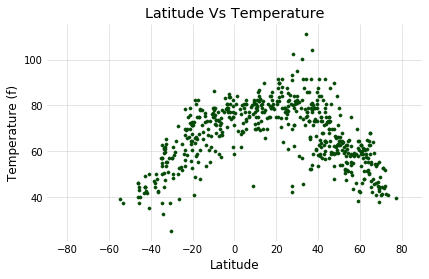

In [6]:

tempplot = plt.scatter(summary_df["Lat"], summary_df["Temperature"], color="xkcd:darkgreen", s=10)
plt.title("Latitude Vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (f)")
plt.grid(alpha=.5)
plt.xlim(-90,90)
plt.box(on="off")
plt.savefig("temp.png")
plt.show()


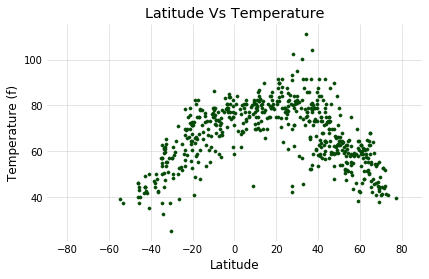

In [7]:

tempplot = plt.scatter(summary_df["Lat"], summary_df["Temperature"], color="xkcd:darkgreen", s=10)
plt.title("Latitude Vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (f)")
plt.grid(alpha=.5)
plt.xlim(-90,90)
plt.box(on="off")
plt.show()

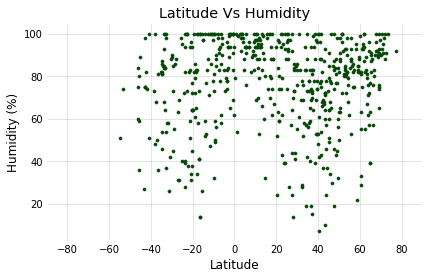

In [8]:
humidityplot = plt.scatter(summary_df["Lat"], summary_df["Humidity"], color="xkcd:darkgreen", s=10)
plt.title("Latitude Vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(alpha=.5)
plt.xlim(-90,90)
plt.box(on="off")
plt.savefig("humid.png")
plt.show()


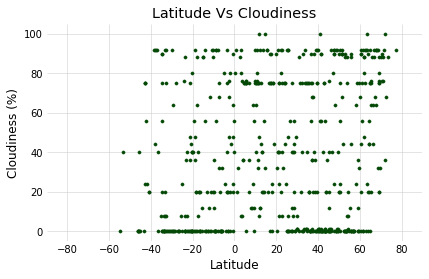

In [9]:
cloudyplot = plt.scatter(summary_df["Lat"], summary_df["Cloudiness"], color="xkcd:darkgreen", s=10)
plt.title("Latitude Vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(alpha=.5)
plt.xlim(-90,90)
plt.box(on="off")
plt.savefig("cloud.png")
plt.show()


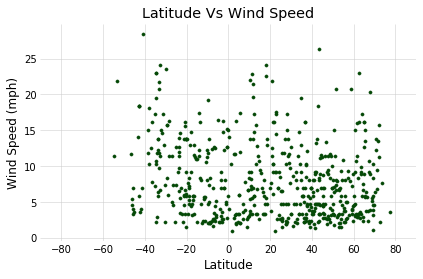

In [10]:
windyplot = plt.scatter(summary_df["Lat"], summary_df["Wind Speed"], color="xkcd:darkgreen", s=10)
plt.title("Latitude Vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(alpha=.5)
plt.xlim(-90,90)
plt.box(on="off")
plt.savefig("windspeed.png")
plt.show()


In [70]:
print(len(summary_df))

577


{"coord": {"lon": -77.04, "lat": 38.9}, "weather": [{"id": 800, "main": "Clear", "description": "clear sky", "icon": "01d"}], "base": "stations", "main": {"temp": 83.43, "pressure": 1013, "humidity": 61, "temp_min": 80.6, "temp_max": 87.8}, "visibility": 16093, "wind": {"speed": 3.36, "deg": 200}, "clouds": {"all": 1}, "dt": 1534187700, "sys": {"type": 1, "id": 1325, "message": 0.0054, "country": "US", "sunrise": 1534155640, "sunset": 1534205062}, "id": 4366164, "name": "Washington DC.", "cod": 200}
